In [8]:
import pandas as pd

# 示例数据
data = [
    {'guest_id': 1, 'session_id': 101, 'viewed': True, 'booked': False},
    {'guest_id': 1, 'session_id': 102, 'viewed': True, 'booked': True},
    {'guest_id': 2, 'session_id': 201, 'viewed': True, 'booked': False},
    {'guest_id': 3, 'session_id': 301, 'viewed': True, 'booked': False},
    {'guest_id': 3, 'session_id': 302, 'viewed': True, 'booked': True},
]
df = pd.DataFrame(data)

# 计算每个guest的转化率
group = df.groupby('guest_id').agg({'viewed': 'sum', 'booked': 'sum'})
group['conversion_rate'] = group['booked'] / group['viewed']
print(group)

          viewed  booked  conversion_rate
guest_id                                 
1              2       1              0.5
2              1       0              0.0
3              2       1              0.5


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

# 假设有特征和标签
X = df[['viewed']]  # 这里只是示例，实际应有更多特征
y = df['booked']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 计算precision和recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Precision:", precision)
print("Recall:", recall)

Precision: 0.0
Recall: 0.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
y_prob = model.predict_proba(X_test)[:, 1]
threshold = 0.7
y_pred_new = (y_prob > threshold).astype(int)
print("New Precision:", precision_score(y_test, y_pred_new))
print("New Recall:", recall_score(y_test, y_pred_new))

New Precision: 0.0
New Recall: 0.0


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Metrics by group:
           bookings  visits  users  booking_rate  visit_rate
group                                                       
control          10      44     57      0.175439    0.771930
treatment         7      35     43      0.162791    0.813953

Booking rate difference: -0.0126
P-value: 0.8692


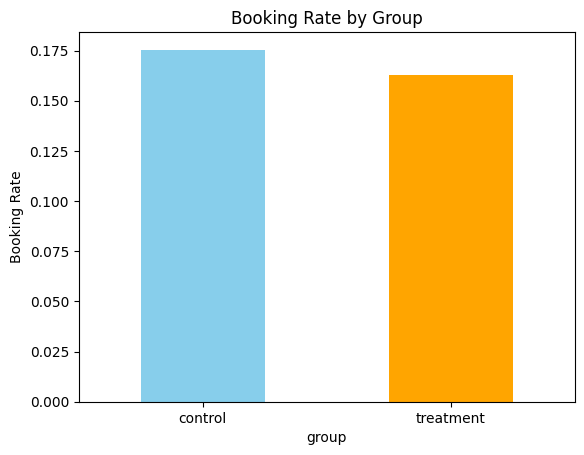

In [7]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

import matplotlib.pyplot as plt

# 示例 booking 表
booking = pd.DataFrame({
    'user_id': np.arange(1, 101),
    'group': np.random.choice(['control', 'treatment'], 100),
    'booked': np.random.binomial(1, 0.15, 100)
})

# 示例 visiting 表
visiting = pd.DataFrame({
    'user_id': np.arange(1, 101),
    'group': booking['group'],
    'visited': np.random.binomial(1, 0.8, 100)
})

# 合并数据
df = pd.merge(booking, visiting, on=['user_id', 'group'])

# 计算各组转化率
metrics = df.groupby('group').agg(
    bookings=('booked', 'sum'),
    visits=('visited', 'sum'),
    users=('user_id', 'count')
)
metrics['booking_rate'] = metrics['bookings'] / metrics['users']
metrics['visit_rate'] = metrics['visits'] / metrics['users']

# 计算 p-value
control = df[df['group'] == 'control']['booked']
treatment = df[df['group'] == 'treatment']['booked']
t_stat, p_value = ttest_ind(control, treatment)

print("Metrics by group:")
print(metrics)
print(f"\nBooking rate difference: {metrics.loc['treatment', 'booking_rate'] - metrics.loc['control', 'booking_rate']:.4f}")
print(f"P-value: {p_value:.4f}")

# 可视化
fig, ax = plt.subplots()
metrics['booking_rate'].plot(kind='bar', ax=ax, color=['skyblue', 'orange'])
ax.set_ylabel('Booking Rate')
ax.set_title('Booking Rate by Group')
plt.xticks(rotation=0)
plt.show()